Test-Notebook

In [ ]:
1+2

Test war erfolgreich.

In [8]:
#Excel-Datei auslesen mit Openpyxl und Pandas (Meine Datei heißt InzidenzenPolenDeutschland.xlsx ud ist ein Abzug, 
#aus der Datei unserer Auftraggeber*innen)
import openpyxl
import pandas

fileXLSX = openpyxl.load_workbook('InzidenzenPolenDeutschland.xlsx')

sheet = fileXLSX["Tabelle1"]

print(sheet['A2'].value)

2021-10-20 00:00:00


In [9]:
for row in sheet['B2':'B10']:
    for col in row:
        print(col.coordinate, col.value)

B2 97
B3 47
B4 46
B5 44
B6 51
B7 54
B8 45
B9 50
B10 47


In [10]:
#Versuch, Inzidenz aus meiner Excel-Datei auszulesen
#leider gescheitert
berlin=3669491

bc=sheet['F2'].value+sheet['F3'].value+sheet['F4'].value+sheet['F5'].value+sheet['F6'].value+sheet['F7'].value+sheet['F8'].value

inz=bc*100000/berlin

print(inz)

1788.204413091625


In [5]:
#API vom RKI von Laras Reposoitory mit Landkreis-ID von Berlin
import requests, json

url = "https://services7.arcgis.com/mOBPykOjAyBO2ZKk/arcgis/rest/services/rki_key_data_v/FeatureServer/0/query?"
lk_id = 11001 # ID für den Kreis Berlin-Mitte gemäß AdmUnit Tabelle
parameter = {
    'referer':'https://www.mywebapp.com',
    'user-agent':'python-requests/2.9.1',
    'where': f'AdmUnitId = {lk_id}', # Welche landkreise sollen zurück gegeben werden
    'outFields': '*', # Rückgabe aller Felder
    'returnGeometry': False, # Keine Geometrien
    'f':'json', # Rückgabeformat, hier JSON
    'cacheHint': True # Zugriff über CDN anfragen
}
result = requests.get(url=url, params=parameter) #Anfrage absetzen
resultjson = json.loads(result.text) # Das Ergebnis JSON als Python Dictionary laden
print(resultjson['features'][0]['attributes']) # Wir erwarten genau einen Datensatz, Ausgabe aller Attribute

{'AdmUnitId': 11001, 'BundeslandId': 11, 'AnzFall': 27990, 'AnzTodesfall': 332, 'AnzFallNeu': 152, 'AnzTodesfallNeu': 2, 'AnzFall7T': 626, 'AnzGenesen': 25800, 'AnzGenesenNeu': 0, 'AnzAktiv': 1900, 'AnzAktivNeu': 100, 'Inz7T': 167.1, 'ObjectId': 266}


In [6]:
newjson=resultjson['features'][0]['attributes']

for key in newjson:
    print(key, ":", newjson[key])

AdmUnitId : 11001
BundeslandId : 11
AnzFall : 27990
AnzTodesfall : 332
AnzFallNeu : 152
AnzTodesfallNeu : 2
AnzFall7T : 626
AnzGenesen : 25800
AnzGenesenNeu : 0
AnzAktiv : 1900
AnzAktivNeu : 100
Inz7T : 167.1
ObjectId : 266


In [7]:
#Directory in Json-String verändert
#unnötig für weiteeres Vorgehen
json_object = json.dumps(resultjson, indent = 4) 
object = json.loads(json_object)
print(object)
print(object['features'][0]['attributes']['Inz7T'])

{'objectIdFieldName': 'ObjectId', 'uniqueIdField': {'name': 'ObjectId', 'isSystemMaintained': True}, 'globalIdFieldName': '', 'fields': [{'name': 'AdmUnitId', 'type': 'esriFieldTypeInteger', 'alias': 'AdmUnitId', 'sqlType': 'sqlTypeInteger', 'domain': None, 'defaultValue': None}, {'name': 'BundeslandId', 'type': 'esriFieldTypeInteger', 'alias': 'BundeslandId', 'sqlType': 'sqlTypeInteger', 'domain': None, 'defaultValue': None}, {'name': 'AnzFall', 'type': 'esriFieldTypeInteger', 'alias': 'AnzFall', 'sqlType': 'sqlTypeInteger', 'domain': None, 'defaultValue': None}, {'name': 'AnzTodesfall', 'type': 'esriFieldTypeInteger', 'alias': 'AnzTodesfall', 'sqlType': 'sqlTypeInteger', 'domain': None, 'defaultValue': None}, {'name': 'AnzFallNeu', 'type': 'esriFieldTypeInteger', 'alias': 'AnzFallNeu', 'sqlType': 'sqlTypeInteger', 'domain': None, 'defaultValue': None}, {'name': 'AnzTodesfallNeu', 'type': 'esriFieldTypeInteger', 'alias': 'AnzTodesfallNeu', 'sqlType': 'sqlTypeInteger', 'domain': None, 

In [8]:
#Beispielcode zum Auslesen einer Directory
jsonString = '{"test": "testValue","test2": "content"}'

obj = json.loads(jsonString)

print(obj["test2"])

content


In [9]:
print('7-Tage-Inzidenz :', object['features'][0]['attributes']['Inz7T'])


7-Tage-Inzidenz : 167.1


In [10]:
print(resultjson['features'][0]['attributes']['Inz7T'])

167.1


In [59]:
#Zugriff auf Dokumentation mit ?
import pandas as pd
pd.Series?

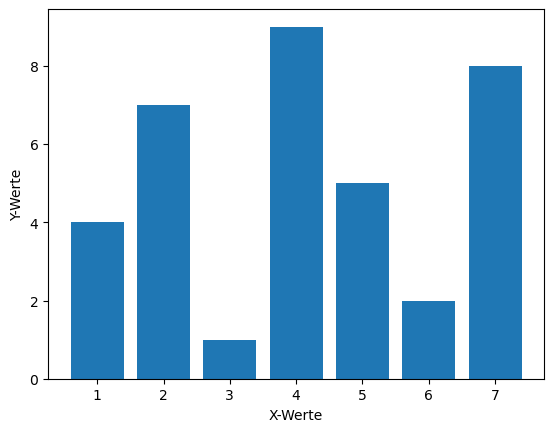

In [14]:
#Beispielcode zum Erstellen eines Balkendiagrammes
import matplotlib.pyplot as plt

ywerte = [4, 7, 1, 9, 5, 2, 8]
xwerte = [1, 2, 3, 4, 5, 6, 7]
plt.bar(xwerte, ywerte)
plt.xlabel("X-Werte")
plt.ylabel("Y-Werte")
plt.show()

In [15]:
#Inzidenz von Steinfurt
url = "https://services7.arcgis.com/mOBPykOjAyBO2ZKk/arcgis/rest/services/rki_key_data_v/FeatureServer/0/query?"
lk_id = 5566 # ID für den Kreis Steinfurt gemäß AdmUnit Tabelle
parameter = {
    'referer':'https://www.mywebapp.com',
    'user-agent':'python-requests/2.9.1',
    'where': f'AdmUnitId = {lk_id}', # Welche landkreise sollen zurück gegeben werden
    'outFields': '*', # Rückgabe aller Felder
    'returnGeometry': False, # Keine Geometrien
    'f':'json', # Rückgabeformat, hier JSON
    'cacheHint': True # Zugriff über CDN anfragen
}
result2 = requests.get(url=url, params=parameter) #Anfrage absetzen
resultjson2 = json.loads(result2.text) # Das Ergebnis JSON als Python Dictionary laden
print(resultjson2['features'][0]['attributes']['Inz7T']) # Wir erwarten genau einen Datensatz, Ausgabe aller Attribute

79


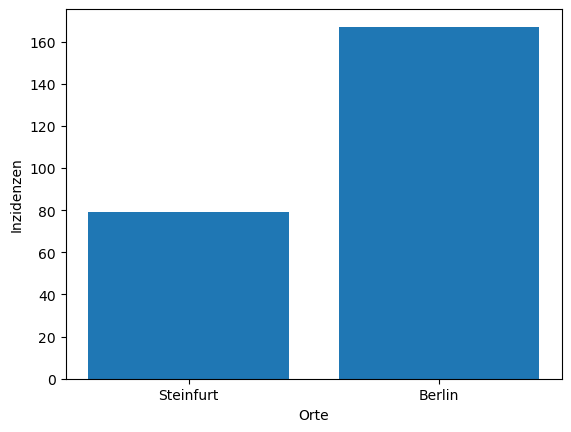

In [20]:
#Balkendiagramm mit den Inzidenzen von Berlin und Steinfurt
steinfurt=resultjson2['features'][0]['attributes']['Inz7T']
berlin=resultjson['features'][0]['attributes']['Inz7T']
ywerte = [steinfurt, berlin]
xwerte = ['Steinfurt', 'Berlin']
plt.bar(xwerte, ywerte)
plt.xlabel("Orte")
plt.ylabel("Inzidenzen")
plt.show()

[1, 2, 3, 4, 5, 6, 7]


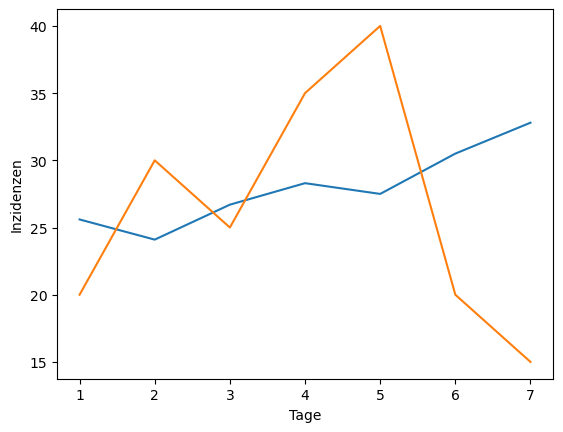

In [21]:
#Möglichhkeit zur Darstellung der Inzidenzen zweier Städte in den letzten 7 Tagen
import matplotlib.pyplot as plt
# die X-Werte:
days = list(range(1, 8, 1))
print(days)
# die Y-Werte:
inzidenzenStadt1 = [25.6, 24.1, 26.7, 28.3, 27.5, 30.5, 32.8]
inzidenzenStadt2 = [20, 30, 25, 35, 40, 20, 15]
plt.xlabel("Tage")
plt.ylabel("Inzidenzen")
plt.plot(days, inzidenzenStadt1, days, inzidenzenStadt2)
plt.show()

[1, 2, 3, 4, 5, 6, 7]


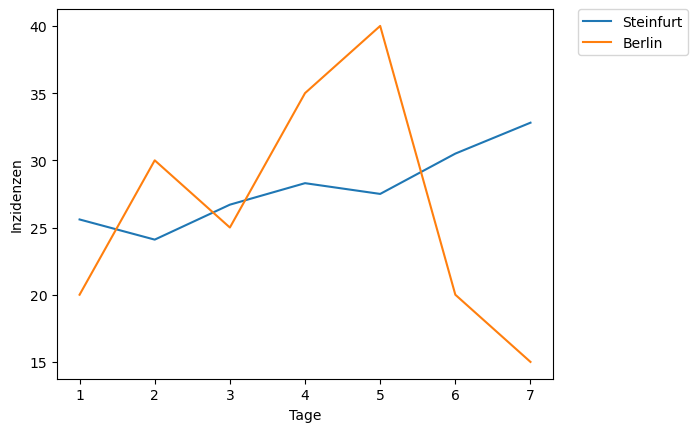

In [58]:
#Möglichhkeit zur Darstellung der Inzidenzen zweier Städte in den letzten 7 Tagen mit Legende
import matplotlib.pyplot as plt
# die X-Werte:
days = list(range(1, 8, 1))
print(days)
# die Y-Werte:
inzidenzenStadt1 = [25.6, 24.1, 26.7, 28.3, 27.5, 30.5, 32.8]
inzidenzenStadt2 = [20, 30, 25, 35, 40, 20, 15]
plt.xlabel("Tage")
plt.ylabel("Inzidenzen")
plt.plot(days, inzidenzenStadt1, label="Steinfurt")
plt.plot(days, inzidenzenStadt2, label="Berlin")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

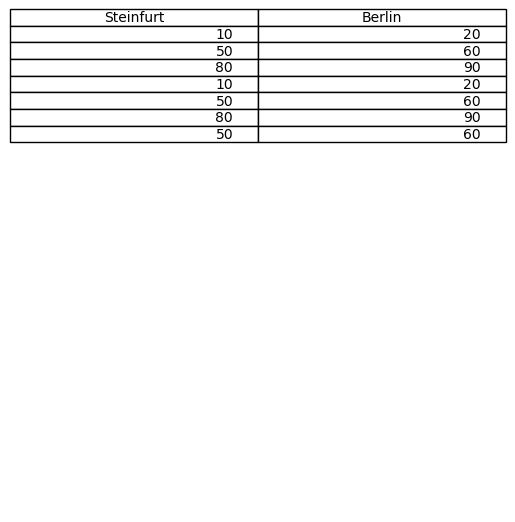

In [57]:
import matplotlib.pyplot as plt

fig, ax =plt.subplots(1,1)
data=[[10,20],
      [50,60],
      [80,90],
      [10,20],
      [50,60],
      [80,90],
      [50,60]]
column_labels=["Steinfurt", "Berlin"]
ax.axis('tight')
ax.axis('off')
ax.table(cellText=data,colLabels=column_labels,loc="top")
plt.show()